In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',as_frame=False)
X, y = mnist.data, mnist.target

/Users/joseluna/anaconda3/envs/data_science/lib/python3.12/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


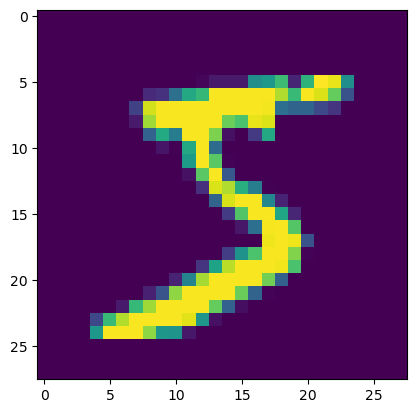

In [2]:
import matplotlib.pyplot as plt
def plotting_digits(image_data):
    image = image_data.reshape(28, 28)
    image = plt.imshow(image,)
some_digits = X[0]
plotting_digits(some_digits)

In [3]:
X_train , X_test , y_train , y_test = X[:60000] , X[60000:], y[:60000] , y[60000:]


## Binary Classifier
We are going to select 5 or not 5 


In [4]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

### Stochatic Gradient Descent


In [5]:
from sklearn.linear_model import SGDClassifier
sgd_classifier = SGDClassifier(random_state=42)
sgd_classifier.fit(X_train,y_train_5)
sgd_classifier.predict([some_digits])

array([ True])

In [6]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_classifier,X_train,y_train_5,cv=3, scoring='accuracy')


array([0.95035, 0.96035, 0.9604 ])

What happens when we have much more frequent than others. When dealing with skew datasets

### Confusion Matrix

In [7]:
from sklearn.model_selection import cross_val_predict

In [8]:
y_trained_pred = cross_val_predict(sgd_classifier,X_train, y_train_5, cv=3)

### F! Score
allows you to combine precision and recall to compare two classifiers 

In [9]:
from sklearn.metrics import f1_score
f1_fitted = f1_score( y_train_5, y_trained_pred)
f1_fitted

0.7325171197343846

In [10]:
y_scores = cross_val_predict(sgd_classifier,X_train, y_train_5, cv=5, method='decision_function')


In [11]:
from sklearn.metrics import precision_recall_curve
precision, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

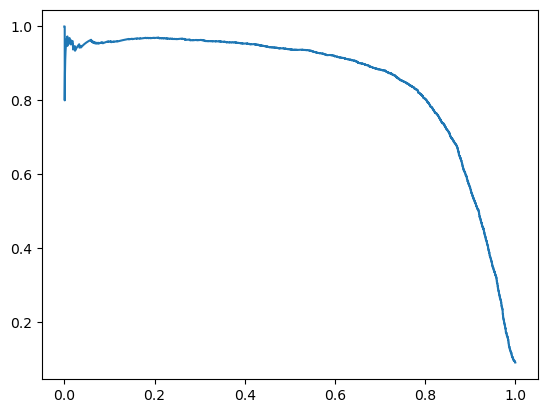

In [12]:
plt.plot(recalls, precision, label='Precision-Recall')

### ROC 
Reciever Operating Characteristics is used for binary classifiers
What is the True Negative Rate(TNR) 


In [13]:
from sklearn.metrics import roc_curve
fpr , tpr, thresholds = roc_curve(y_train_5, y_scores)